In [11]:
import pandas as pd
food_price_data = pd.read_csv('food_price_data.csv')

In [12]:
food_price_data.head()

,Food item,Price at TJs,Quantity,Unit,Brand/Type at TJs,Price at Safeway,Quantity,Unit.1,Brand/Type at Safeway,Price at Berkeley Bowl ($),Quantity.1,Unit.2,Brand/Type at Berkeley Bowl,Price at Whole Foods,Quantity.2,Unit.3,Brand/Type at Whole Foods
0,Bread,$3.49,24.0,oz,TJs Sourdough Sandwich Bread,$4.99,24.0,oz,Signature SELECT Bread Long Sliced Loaf San Fr...,$7.69,20.0,oz,Oroweat Organic Thin-Sliced Rustic White Bread...,$5.99,12.0,oz,Soft & Delicious White Sandwich Bread
1,Rice,$3.29,3.0,lb,TJs Jasmine Rice,$6.79,5.0,lb,Mahatma Jasmine Thai Fragrant Long Grain Rice ...,$2.09,1.0,lb,White Basmati Rice,$3.69,1.0,lb,Organic White Long Grain Rice
2,Pasta,$0.99,1.0,lb,TJs Orzo Italian Pasta,$1.50,16.0,oz,Signature SELECT Pasta Penne Rigate Box,$2.59,16.0,oz,Soft & Delicious White Sandwich Bread,$1.59,16.0,oz,"Pasta, Spaghetti"
3,Apples,$1.29,1.0,each,Honeycrisp Apples,$2,1.0,each,Honeycrisp apples,$1.59,1.0,lb,NaN,$2.49,1.0,lb,Honeycrisp Apples
4,Tomatoes,$2.99,1.0,lb,TJs Campari Tomatoes,$3.49,1.0,lb,Red roma tomato,$1.59,1.0,lb,Roma Tomatoes,$2.99,1.0,lb,Roma Tomato


In [13]:
food_categories = {
    'Meats': ['Chicken', 'Beef', 'Pork', 'Turkey', 'Salmon', 'Tuna'],  # Example items
    'Dairy': ['Milk', 'Cheese', 'Yogurt'],
    'Eggs': ['Eggs'],
    'Legumes and Nuts': ['Beans', 'Lentils', 'Peanuts', 'Almonds', 'Nuts'],
    'Vegetables': ['Tomato', 'Lettuce', 'Carrot', 'Broccoli', 'Spinach', 'Peppers', 'Onions', 'Vegetables'],
    'Fruits': ['Apple', 'Banana', 'Orange', 'Berries', 'Fruits'],
    'Grains': ['Bread', 'Rice', 'Pasta', 'Wheat', 'Oats', 'Grains']
}

In [14]:
# Adjust the categorization function to handle non-string values safely
def categorize_food_safe(item_name):
    if pd.isnull(item_name) or not isinstance(item_name, str):
        return 'Others'  # Handle missing or non-string food item names
    for category, keywords in food_categories.items():
        if any(keyword.lower() in item_name.lower() for keyword in keywords):
            return category
    return 'Others'  # Default category if no match is found

# Re-apply the categorization function to the food items
food_price_data['Category'] = food_price_data['Food item'].apply(categorize_food_safe)

# Re-display the distribution of categories to check the categorization
category_distribution = food_price_data['Category'].value_counts()
category_distribution

Others              16
Vegetables           5
Meats                4
Grains               3
Dairy                3
Fruits               1
Eggs                 1
Legumes and Nuts     1
Name: Category, dtype: int64

In [15]:
food_price_data.head()

,Food item,Price at TJs,Quantity,Unit,Brand/Type at TJs,Price at Safeway,Quantity,Unit.1,Brand/Type at Safeway,Price at Berkeley Bowl ($),Quantity.1,Unit.2,Brand/Type at Berkeley Bowl,Price at Whole Foods,Quantity.2,Unit.3,Brand/Type at Whole Foods,Category
0,Bread,$3.49,24.0,oz,TJs Sourdough Sandwich Bread,$4.99,24.0,oz,Signature SELECT Bread Long Sliced Loaf San Fr...,$7.69,20.0,oz,Oroweat Organic Thin-Sliced Rustic White Bread...,$5.99,12.0,oz,Soft & Delicious White Sandwich Bread,Grains
1,Rice,$3.29,3.0,lb,TJs Jasmine Rice,$6.79,5.0,lb,Mahatma Jasmine Thai Fragrant Long Grain Rice ...,$2.09,1.0,lb,White Basmati Rice,$3.69,1.0,lb,Organic White Long Grain Rice,Grains
2,Pasta,$0.99,1.0,lb,TJs Orzo Italian Pasta,$1.50,16.0,oz,Signature SELECT Pasta Penne Rigate Box,$2.59,16.0,oz,Soft & Delicious White Sandwich Bread,$1.59,16.0,oz,"Pasta, Spaghetti",Grains
3,Apples,$1.29,1.0,each,Honeycrisp Apples,$2,1.0,each,Honeycrisp apples,$1.59,1.0,lb,NaN,$2.49,1.0,lb,Honeycrisp Apples,Fruits
4,Tomatoes,$2.99,1.0,lb,TJs Campari Tomatoes,$3.49,1.0,lb,Red roma tomato,$1.59,1.0,lb,Roma Tomatoes,$2.99,1.0,lb,Roma Tomato,Vegetables


In [16]:
# Define a function to convert all prices to price per standard unit
def standardize_price(row, unit_col_suffixes, price_col_prefixes, standard_units):
    # For each store, adjust the price based on quantity and standard unit
    for price_prefix in price_col_prefixes:
        for unit_suffix in unit_col_suffixes:
            # Identify the columns for price, quantity, and unit for each store
            price_col = f'{price_prefix} {unit_suffix}'.strip()
            quantity_col = f'Quantity{unit_suffix}'.strip()
            unit_col = f'Unit{unit_suffix}'.strip()
            
            # Skip if any column is missing
            if price_col not in row or quantity_col not in row or unit_col not in row:
                continue
            
            # Get the current unit and quantity
            current_unit = row[unit_col]
            quantity = row[quantity_col]
            if pd.isnull(quantity) or pd.isnull(current_unit):
                continue  # Skip if quantity or unit is missing
            
            # Convert price to float and remove currency symbols
            try:
                price = float(row[price_col].replace('$', ''))
            except:
                continue  # Skip if price conversion fails
            
            # Determine the standard unit for this item's category
            standard_unit = standard_units.get(row['Category'], 'each')  # Default to 'each'
            
            # Convert quantities to standard unit (assuming 16 oz in a lb for simplicity)
            if current_unit == 'oz' and standard_unit == 'lb':
                quantity_in_standard_unit = quantity / 16.0
            elif current_unit == 'lb' and standard_unit == 'lb':
                quantity_in_standard_unit = quantity
            elif current_unit == 'each' and standard_unit == 'each':
                quantity_in_standard_unit = quantity
            else:
                quantity_in_standard_unit = quantity  # No conversion needed for other cases
            
            # Calculate price per standard unit and update the dataframe
            if quantity_in_standard_unit > 0:
                price_per_standard_unit = price / quantity_in_standard_unit
                row[price_col] = price_per_standard_unit
    
    return row

In [17]:

# Define standard units for each category (simplified for this example)
standard_units = {
    'Meats': 'lb',
    'Dairy': 'lb',
    'Eggs': 'doz',  # Assuming all egg prices are given per dozen, even though it's not explicitly stated
    'Legumes and Nuts': 'lb',
    'Vegetables': 'lb',
    'Fruits': 'each',
    'Grains': 'lb'
}

# Unit and price column suffixes and prefixes
unit_col_suffixes = ['', '.1', '.2', '.3']
price_col_prefixes = ['Price at TJs', 'Price at Safeway', 'Price at Berkeley Bowl ($)', 'Price at Whole Foods']


In [18]:
# Apply the standardization function to each row
food_price_data_standardized = food_price_data.apply(lambda row: standardize_price(row, unit_col_suffixes, price_col_prefixes, standard_units), axis=1)

# Display the first few rows of the updated dataframe to verify the changes
food_price_data_standardized.head()

,Food item,Price at TJs,Quantity,Unit,Brand/Type at TJs,Price at Safeway,Quantity,Unit.1,Brand/Type at Safeway,Price at Berkeley Bowl ($),Quantity.1,Unit.2,Brand/Type at Berkeley Bowl,Price at Whole Foods,Quantity.2,Unit.3,Brand/Type at Whole Foods,Category
0,Bread,2.326667,24.0,oz,TJs Sourdough Sandwich Bread,3.326667,24.0,oz,Signature SELECT Bread Long Sliced Loaf San Fr...,5.126667,20.0,oz,Oroweat Organic Thin-Sliced Rustic White Bread...,3.993333,12.0,oz,Soft & Delicious White Sandwich Bread,Grains
1,Rice,0.658000,3.0,lb,TJs Jasmine Rice,1.358000,5.0,lb,Mahatma Jasmine Thai Fragrant Long Grain Rice ...,0.418000,1.0,lb,White Basmati Rice,0.738000,1.0,lb,Organic White Long Grain Rice,Grains
2,Pasta,0.061875,1.0,lb,TJs Orzo Italian Pasta,0.093750,16.0,oz,Signature SELECT Pasta Penne Rigate Box,0.161875,16.0,oz,Soft & Delicious White Sandwich Bread,0.099375,16.0,oz,"Pasta, Spaghetti",Grains
3,Apples,1.290000,1.0,each,Honeycrisp Apples,2.000000,1.0,each,Honeycrisp apples,1.590000,1.0,lb,NaN,2.490000,1.0,lb,Honeycrisp Apples,Fruits
4,Tomatoes,2.990000,1.0,lb,TJs Campari Tomatoes,3.490000,1.0,lb,Red roma tomato,1.590000,1.0,lb,Roma Tomatoes,2.990000,1.0,lb,Roma Tomato,Vegetables


In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare data for plotting
# Extract relevant columns for plotting: store names, price, and category
plot_data = pd.melt(food_price_data_standardized, 
                    id_vars=['Food item', 'Category'], 
                    value_vars=['Price at TJs', 'Price at Safeway', 'Price at Berkeley Bowl ($)', 'Price at Whole Foods'],
                    var_name='Store', value_name='Price')


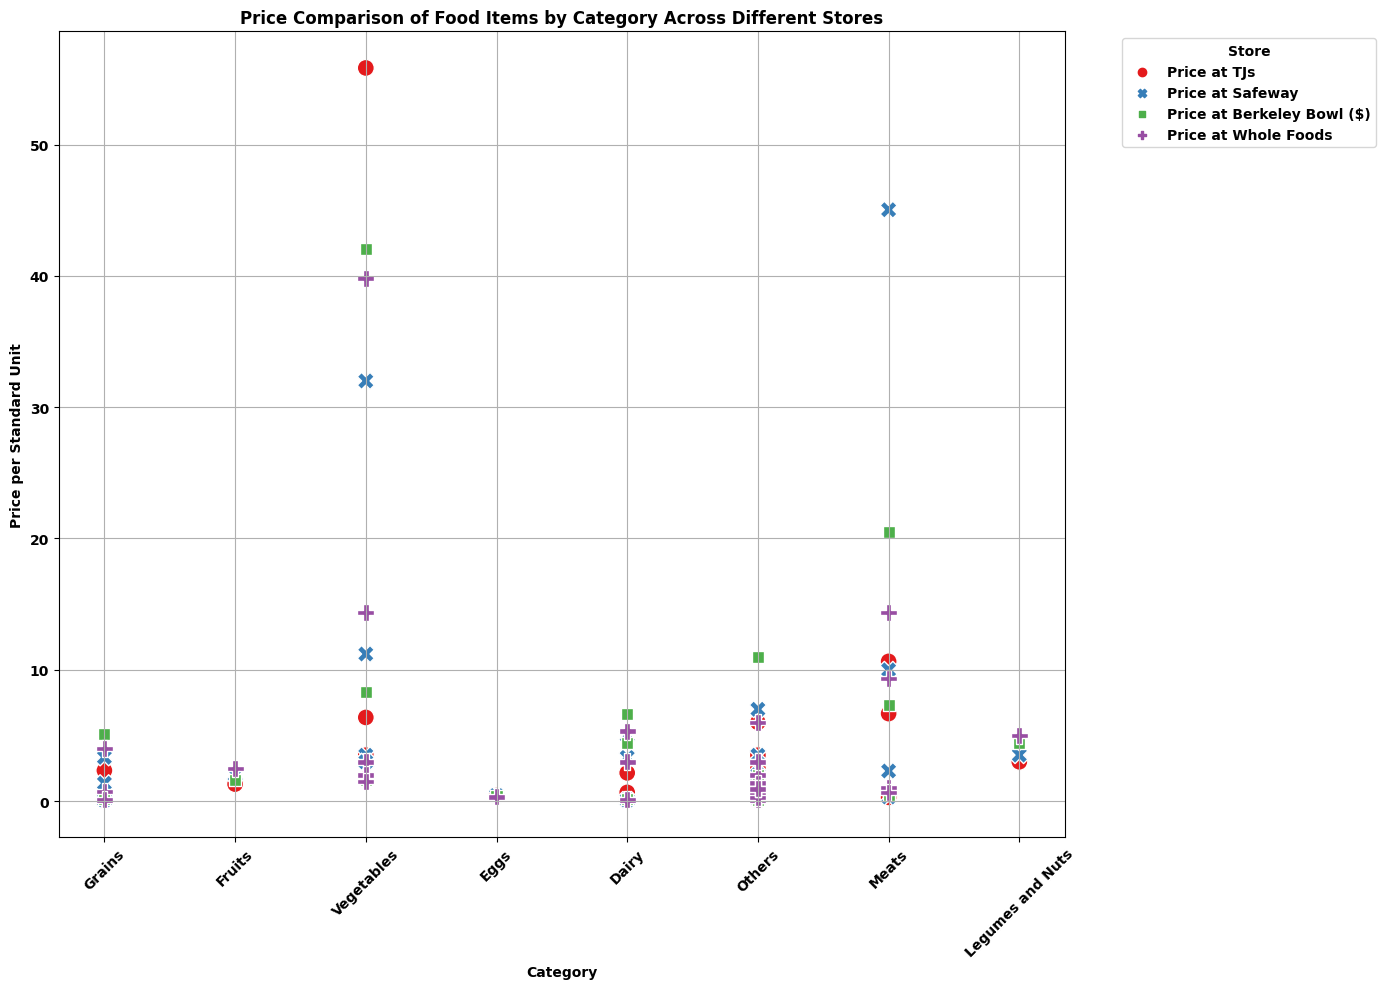

In [20]:
plot_data['Store'] = plot_data['Store'].replace({
    'Trader Joes': 'TJs',
    'Berkeley Bowl': 'Berkeley Bowl',  # Adjusting for consistency
    'Whole Foods': 'Whole Foods',      # Adjusting for consistency
})

# Plotting with the new specifications
plt.figure(figsize=(14, 10))
sns.scatterplot(data=plot_data, x='Category', y='Price', hue='Store', style='Store', palette='Set1', s=150)
plt.title('Price Comparison of Food Items by Category Across Different Stores')
plt.ylabel('Price per Standard Unit')
plt.xlabel('Category')
plt.xticks(rotation=45)
plt.legend(title='Store', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(True)  # Adding grid for better readability
plt.show()